<a href="https://colab.research.google.com/github/omkardesai98/Hotel_Booking_Analysis/blob/main/Copy_of_omkar_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Importing important Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/cohort-chicago/Capston Project/Copy of Hotel Bookings.csv'

In [5]:
df = pd.read_csv(file_path)

# Exploring the Data

In [6]:
# finding shape(i.e number of rows and column) of the dataset 
df.shape

(119390, 32)

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df1= df.copy()

In [11]:
print(list(df1.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [12]:
# changing the reservation_status_date datatype from object to datetime
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

# DATA DESCRIPTION :
1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*
23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel 


# Cleaning data

In [14]:
df1.duplicated().value_counts() # there are 31994 rows which are duplicate and 87396 unique rows

False    87396
True     31994
dtype: int64

Text(0, 0.5, 'number of rows')

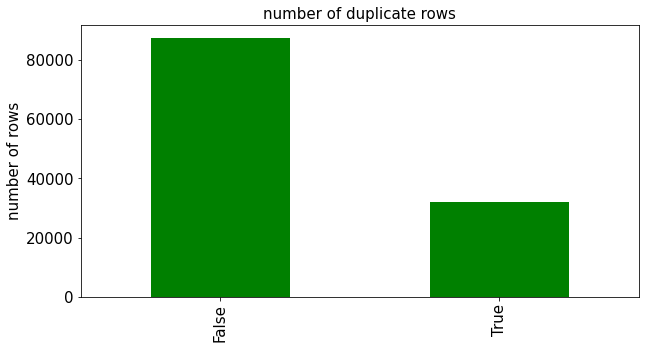

In [15]:
# lets visualize the figures with the help of graph
a = df1.duplicated().value_counts()
ax= a.plot.bar(figsize = (10,5),fontsize = 15,color = 'green')
ax.set_title('number of duplicate rows',fontsize = 15)
ax.set_ylabel('number of rows',fontsize = 15)
# true indicate the number of duplicate rows


In [16]:
# dropping all duplicates values
df1 = df1.drop_duplicates() 

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87396 non-null  object        
 1   is_canceled                     87396 non-null  int64         
 2   lead_time                       87396 non-null  int64         
 3   arrival_date_year               87396 non-null  int64         
 4   arrival_date_month              87396 non-null  object        
 5   arrival_date_week_number        87396 non-null  int64         
 6   arrival_date_day_of_month       87396 non-null  int64         
 7   stays_in_weekend_nights         87396 non-null  int64         
 8   stays_in_week_nights            87396 non-null  int64         
 9   adults                          87396 non-null  int64         
 10  children                        87392 non-null  float64       
 11  b

In [18]:
# checking is there any null values present in our dataset
df1.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


## we found that there are some null value present in columns like country,agent,company

In [19]:
# dropping unnecessary column
df1.drop(columns = ['agent','company'],inplace = True)

#### we can assume that compnay and agent data might not be necessary as these are IDs of the entities. They could be government-issued IDs like tax registration numbers or just regular IDs that the hotels assigned

In [20]:
df1['country'].fillna('other',inplace = True) # filling all nan values of country with the "other" we assume that while collecting data country was not found so user selected other
df1['children'].fillna(0,inplace = True) # filling nan values in children column with '0' considering no children

In [21]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [22]:
# dropping all rows where sum of adults, children & babies equal to zero simply means there is no booking 
df1.drop(df1[df1['adults']+df1['children']+df1['babies'] == 0].index,inplace = True)

In [23]:
# again rechecking whether the data is cleaned or not 
print(df1.isna().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  float64       
 11  b

# Q1) How many types of hotels are there And What is most preferred hotel?

In [25]:
df1['hotel'].value_counts()


City Hotel      53274
Resort Hotel    33956
Name: hotel, dtype: int64

### So there are namely two type of hotels,1) City Hotel 2)Resort Hotel, from which there are total 53274 number of City Hotels are there and 33956 number of Resort Hotels 

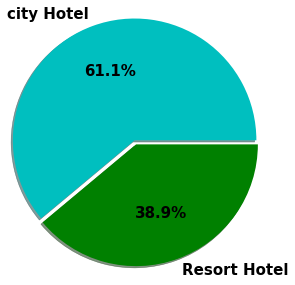

In [71]:
# visualizing the percentage of the resort hotel and city hotel through pie diagram
a1 = df1['hotel'].value_counts() 
b = plt.pie(a1,labels =['city Hotel','Resort Hotel'],explode = [0.05,0],colors = ['c','g'],autopct = "%0.1f%%",radius = 1.4,textprops = {'fontsize':15},shadow = 1.8)


### we can see through pie chart that most preferred hotels are city hotels with maximum percentage of about 61.1%

# Q2) Which Type of meals are mostly preferred?

In [27]:
df1['meal'].value_counts()

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0.5, 1.0, 'Preferred Meal Type')

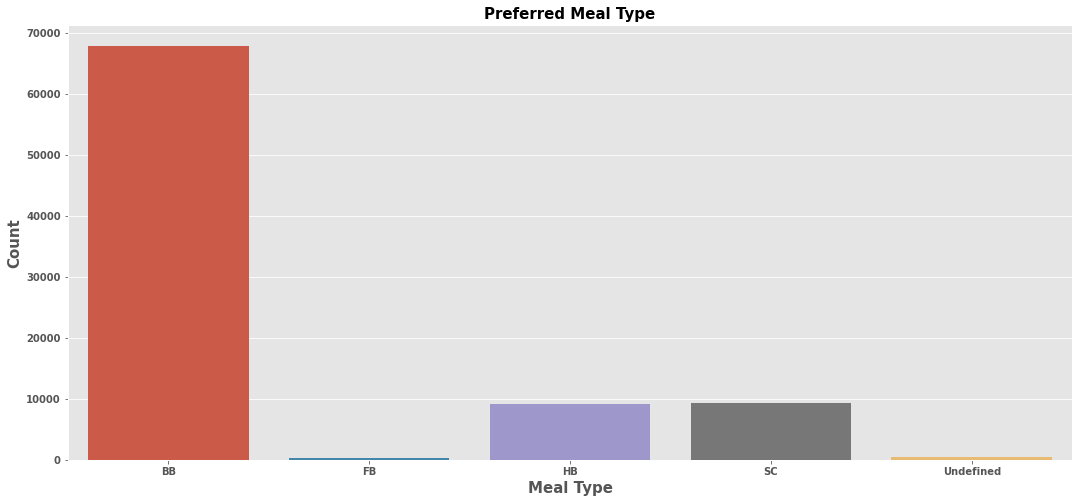

In [70]:
plt.figure(figsize=(18,8))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title("Preferred Meal Type",fontsize = 15)


1) BB- (Bed and Breakfast)

2) HB- (Half Board)

3) FB- (Full Board)

4) SC- (Self Catering) 

From graph we can see that bed and breakfast is the most preferred meal type


# Q3) Which are the most busiest month of the year?

In [29]:
df1['arrival_date_month'].value_counts()

August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: arrival_date_month, dtype: int64

In [30]:
#gourpby arrival_date_month and taking hotel count 
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})

In [31]:
bookings_by_months_df

,arrival_date_month,Counts
0,April,7900
1,August,11242
2,December,5112
3,February,6083
4,January,4685
5,July,10043
6,June,7756
7,March,7489
8,May,8344
9,November,4973


In [32]:
# sort the bookings_by_months_df according to the months in year from january to December
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# use pd.CategoricalIndex to sort arrival_date_month according to the list provided
bookings_by_months_df.index = pd.CategoricalIndex(bookings_by_months_df['arrival_date_month'],categories=months,ordered = True)
# sorting bookings_by_months
bookings_by_months_df = bookings_by_months_df.sort_index().reset_index(drop = True)
bookings_by_months_df

,arrival_date_month,Counts
0,January,4685
1,February,6083
2,March,7489
3,April,7900
4,May,8344
5,June,7756
6,July,10043
7,August,11242
8,September,6682
9,October,6921


Text(0, 0.5, 'Count of customers')

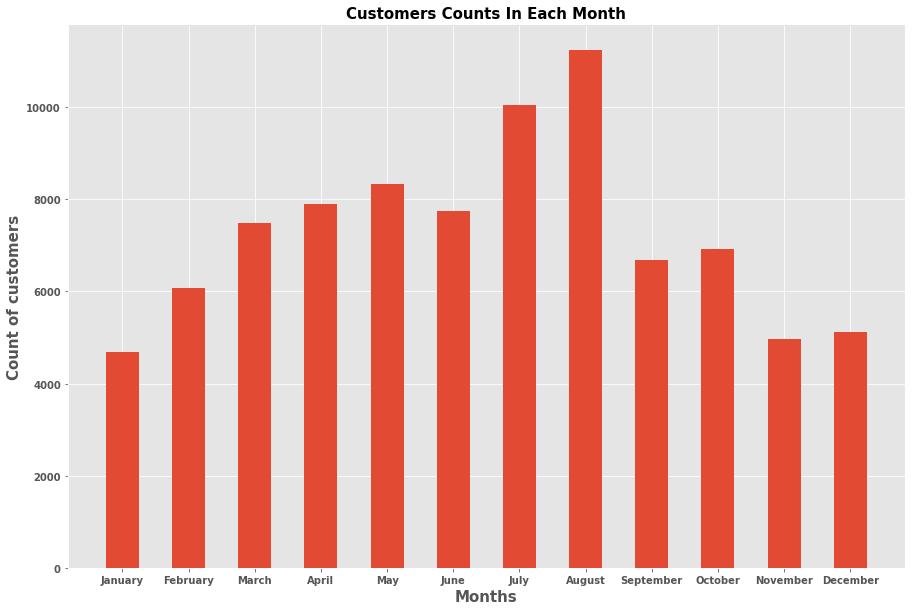

In [72]:
# visualizing in better way with the help of bar diagram
plt.figure(figsize = (15,10))
plt.bar(bookings_by_months_df['arrival_date_month'],bookings_by_months_df['Counts'],width = 0.5)
plt.title('Customers Counts In Each Month',fontsize = 15)
plt.xlabel('Months',fontsize = 15)
plt.ylabel('Count of customers',fontsize = 15)


#### From the graph, it's clear that August and July are the busiest months of the year. It may be because of the ''monsoon vacation'' and also a lot of ''festivals'' also come in these months

# Q4) Which hotel type has the more lead time?

In [34]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [35]:
avg_lead_time = df1.groupby(['hotel'])['lead_time'].mean().reset_index()
avg_lead_time

,hotel,lead_time
0,City Hotel,77.793257
1,Resort Hotel,83.387737


Text(0, 0.5, 'time in days')

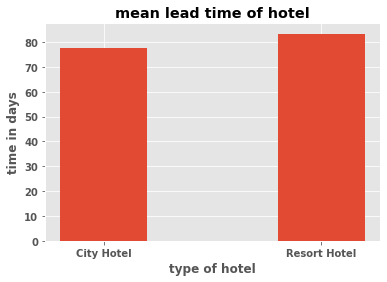

In [75]:
plt.bar(avg_lead_time['hotel'],avg_lead_time['lead_time'],width=0.4)
plt.title('mean lead time of hotel')
plt.xlabel('type of hotel')
plt.ylabel('time in days')


### From the graph we can deduce that average lead time of resort hotels are more than city hotels, resort hotel have lead time more than 80 days

# Q5) What is relation between adr and total stay?

In [37]:
df1['total stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights'] 

In [38]:
adr_vs_stay = df1.groupby(['total stay','adr','hotel']).agg('count').reset_index()
adr_vs_stay = adr_vs_stay.iloc[:,:3]
adr_vs_stay=adr_vs_stay[:18000] # taking only first 18000 rows

Text(0.5, 1.0, 'relationship between adr and total stay')

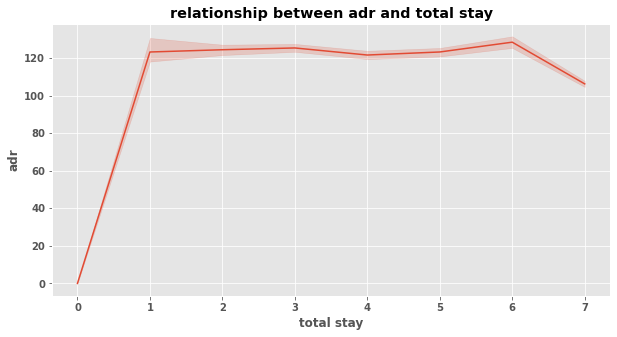

In [76]:
plt.figure(figsize= (10,5))
sns.lineplot(x = 'total stay',y = 'adr',data = adr_vs_stay,sizes = (10,15))
plt.title('relationship between adr and total stay')

### we can see that as the total stay increses adr(average daily rate) decreases

#Q6) Which are the top 10 countries with most booking?


Text(0.5, 1.0, 'number of customers according to country')

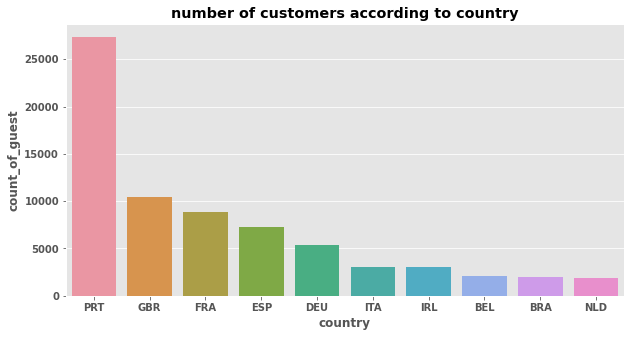

In [77]:
#plotting graph of top 10 countries with most bookings
country_df = df1['country'].value_counts().reset_index().rename(columns = {'index':'country','country':'count_of_guest'})[:10]
plt.figure(figsize = (10,5))
sns.barplot(x = country_df['country'],y = country_df['count_of_guest'],data =country_df)
plt.title('number of customers according to country')

Full form of abbreviation used
1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands


### That is more number of guest are comming from the portugal which are around more than 25000

#Q7) Which are the room type with highest average daily rates  

In [41]:
adr_vs_room_type = df1.groupby(['assigned_room_type'])['adr'].median().reset_index()
adr_vs_room_type

,assigned_room_type,adr
0,A,91.68
1,B,91.60
2,C,100.00
3,D,107.00
4,E,109.00
5,F,161.00
6,G,164.00
7,H,163.75
8,I,0.00
9,K,80.00


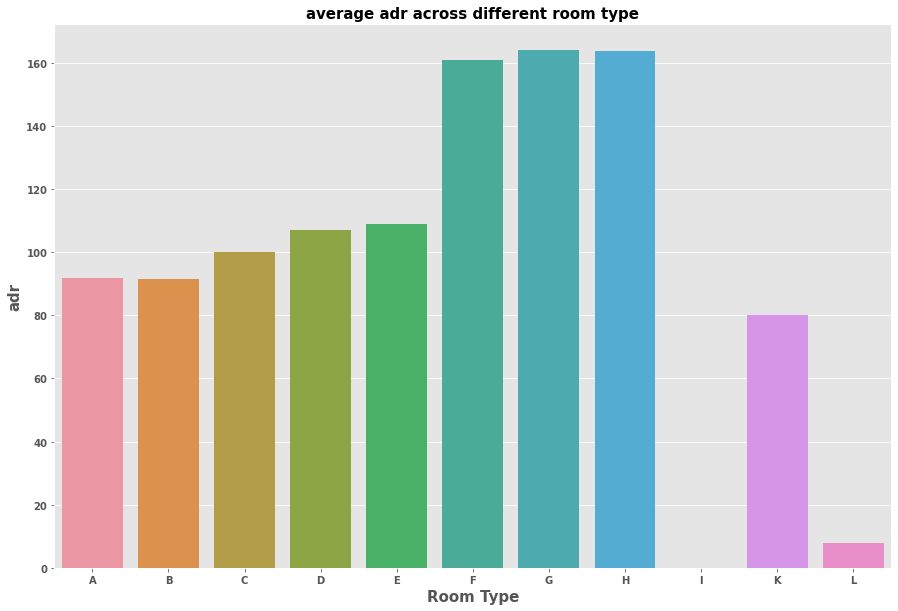

In [78]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'assigned_room_type',y = 'adr',data = adr_vs_room_type)
plt.title('average adr across different room type',fontsize = 15)
plt.xlabel('Room Type',fontsize= 15)
plt.ylabel('adr',fontsize = 15)
plt.show()

### F,G and H are three room type with highest average daily rate and can give higher revenue

#Q8) Which Distribution channel is mostly used for hotel bookings?

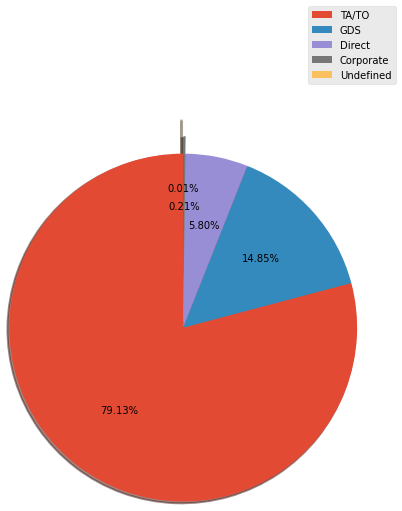

In [67]:
d = df1['distribution_channel'].value_counts()
plt.pie(d,radius = 2,autopct = '%0.2f%%',textprops = {'fontsize':10},shadow = 5,startangle = 90,explode = [0,0,0,0.2,0.4],wedgeprops = {'linewidth':2}) 
plt.legend(labels=['TA/TO','GDS','Direct','Corporate','Undefined'],loc='best', bbox_to_anchor=(1.5, 2))
plt.show()


### most of the guest are making reservation through TA/TO (Travel Agency/Tour Operator) with percentage of 79.13%

#Q9) Averag adr across various distribution channels

<Figure size 1080x720 with 0 Axes>

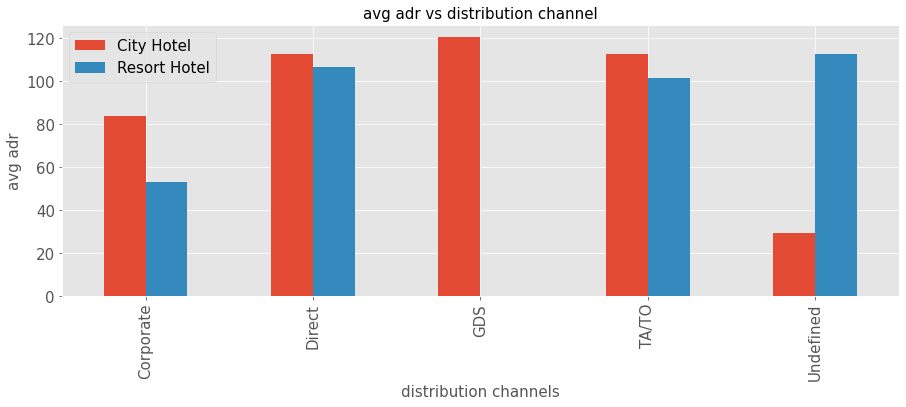

In [44]:
plt.figure(figsize = (15,10))
a = df1.groupby(['distribution_channel','hotel'])['adr'].mean().unstack().plot(kind = 'bar',figsize = (15,5),fontsize = 15)
a.set_title('avg adr vs distribution channel',fontsize =15)
a.set_xlabel('distribution channels',fontsize = 15)
a.set_ylabel('avg adr',fontsize = 15)
a.legend(loc = 'upper left',fontsize =15)
plt.show()

#### From plot it's clear that GDS channel bought higher revenue for City Hotel hence to have higher revenue city hotel work to increase outreach on GDS channels.

#Q10) What is the effect on cancellation of booking when customer not getting reserved room type 

In [45]:
def room_check(x):
      if x['reserved_room_type'] != x['assigned_room_type']:
        return 1
      else:
        return 0

In [46]:
df1['Same_room_alloted_or_not'] = df1.apply(lambda x:room_check(x),axis = 1)

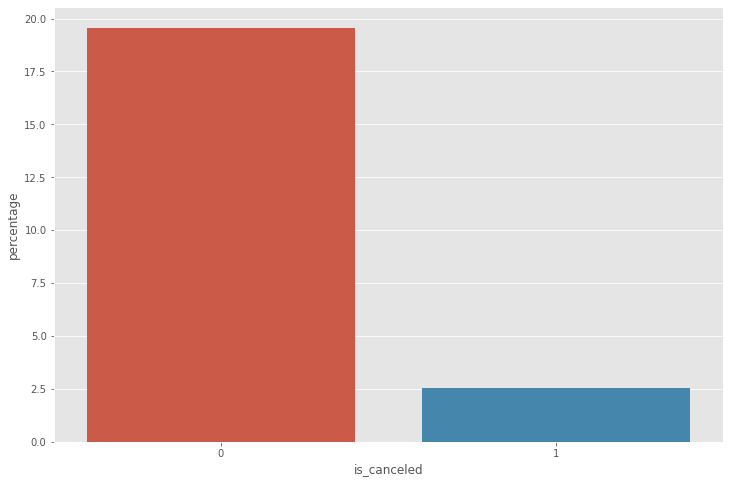

In [47]:
#groupby is canceled
grp_by_canceled_df=df1.groupby('is_canceled')

# create DataFrame and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

### Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.

#Q11) Adr across different months

In [48]:

adr_vs_month = df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

In [49]:
adr_vs_month['arrival_date_month'] = pd.Categorical(adr_vs_month['arrival_date_month'],categories = months,ordered = True)

In [50]:
# sorting values
adr_vs_month = adr_vs_month.sort_values('arrival_date_month')

Text(0, 0.5, 'ADR')

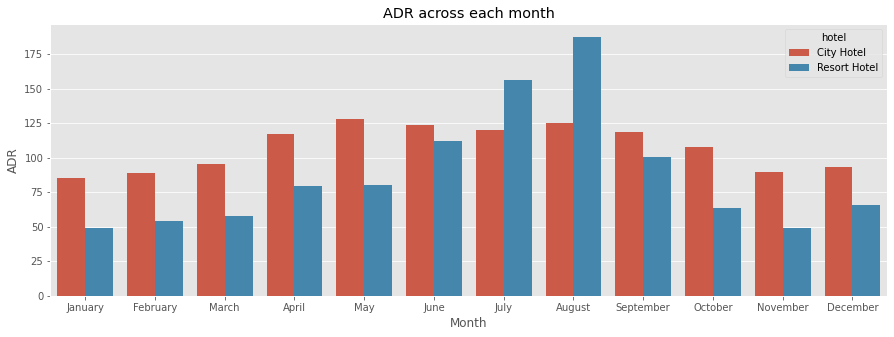

In [51]:
plt.figure(figsize = (15,5))
sns.barplot(x = adr_vs_month['arrival_date_month'],y = adr_vs_month['adr'],hue = adr_vs_month['hotel'])
# setting the title and labels
plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

##### For Resort Hotel Highest ADR is in the month of august and july, it may be becuase lot of customers want to spend their vacation in Resort Hotel by looking at plot we can deduce that best time to visit Resort Hotel is November and December (i.e winter season) cause ADR is lowest in these months.

#Q12) Number of special request according to number of kids

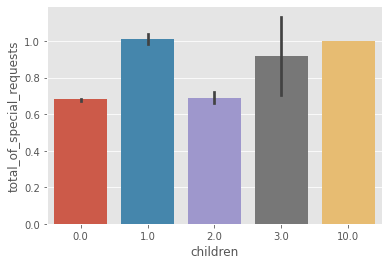

In [52]:

sns.barplot(x = df1['children'],y= df1['total_of_special_requests'])

### Number of special request remain almost same when there are kids

#Q13) What is the correlation of the columns?

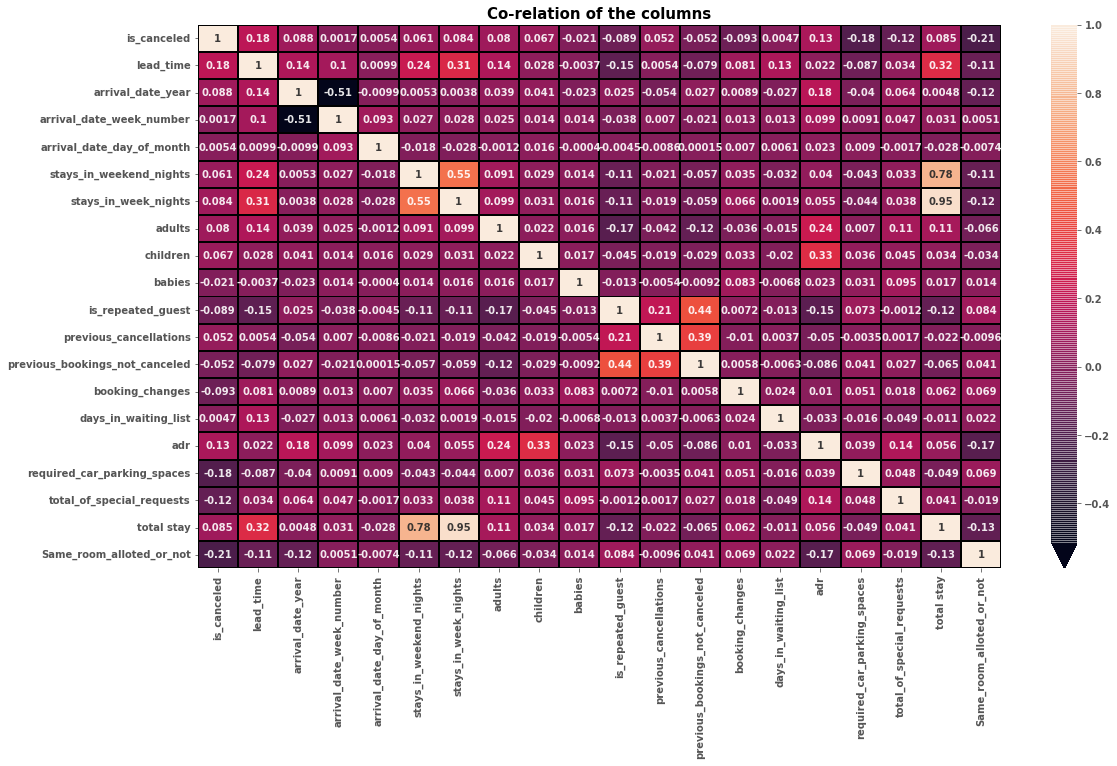

In [69]:
plt.figure(figsize=(18,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = 'bold'
annot_kws = {'fontsize':10,
             'alpha':0.9
            }
cbar_kws = {'shrink':1,
            'drawedges':True,
            'extend':'min',
            }
sns.heatmap(df1.corr(),annot=True,annot_kws = annot_kws,linewidth = 1,linecolor='k',cbar_kws=cbar_kws)
plt.title('Co-relation of the columns',fontsize = 15)
plt.show()

### From heatmap we can conclude that 
###1) is_canceled is negatively correlated with same_room_alloted_or_not hence person is unlikely to cancel their booking if he don't get the same room as per reserved room . 
###2) lead_time and total stay is positively correlated hence more the stay more will be the lead time.
###3) is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.
###4) adult,children and babies are positively correlated to adr hence more the people more will be the adr

# Q14) How lead time vary according to the month?

In [54]:
# using groupby 
lead_time_vs_month = df1.groupby(['arrival_date_month','hotel'])['lead_time'].mean().reset_index()
lead_time_vs_month.pivot(index = 'arrival_date_month',columns='hotel',values='lead_time')

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,78.437303,71.299151
August,102.963808,102.475782
December,64.783522,50.944182
February,38.105542,30.997191
January,41.486784,24.752167
July,117.604712,104.497102
June,89.010406,131.193911
March,54.335609,52.123870
May,85.223991,105.111829


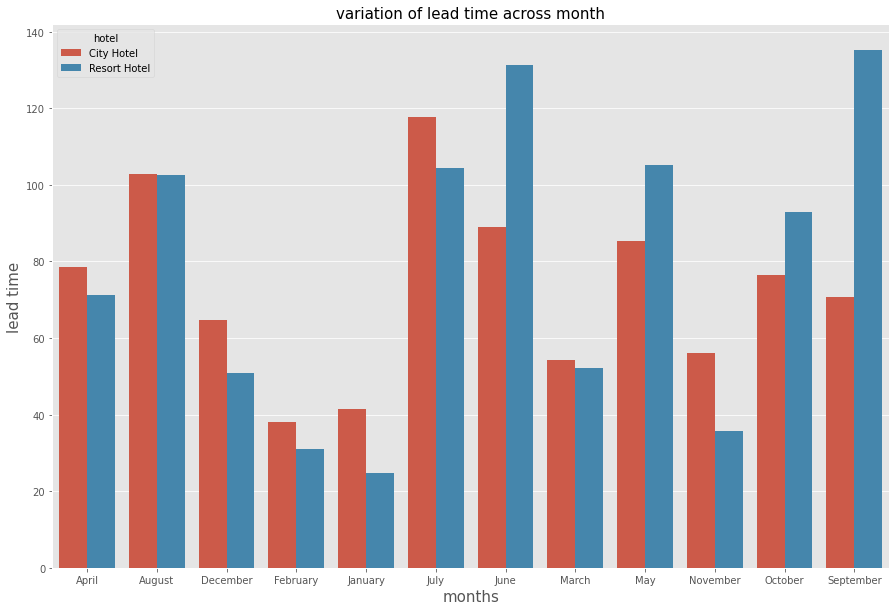

In [55]:
# ploting the graph
plt.figure(figsize = (15,10))
sns.barplot(data = lead_time_vs_month,x = 'arrival_date_month',y= 'lead_time',hue='hotel')
plt.title('variation of lead time across month',fontsize = 15)
plt.ylabel('lead time',fontsize = 15)
plt.xlabel('months',fontsize = 15)
plt.show()


### Observation : From graph it's clear that for 'Resort Hotel' lead time is more in the month of june and september and for 'City Hotel' lead time is more in july and August

# **Conclusions** : 
1. City Hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
2. BB( Bed & Breakfast) is the most preferred  type of meal by the guests.
3. Average lead time of resort hotels are more than city hotels, resort hotel have lead time of about 80 days. 
4. Maximum number of guests were from Portugal, i.e. more than 25000 guests.
5. most of the guest are making reservation through TA/TO (Travel Agency/Tour Operator) with percentage of 79.13%
6. F,G and H are three room type with highest average daily rate and can give higher revenue
7. For 'Resort Hotel' lead time is more in the month of june and september and for 'City Hotel' lead time is more in july and August
8. August and July are the busiest months of the year. It may be because of the ''vacation'' and also a lot of ''festivals''come in these months
9. As the total stay increses adr(average daily rate) decreases.
